In [59]:
#!/usr/bin/env python3

import datetime
import json
import os
import re
import fnmatch
from PIL import Image
import numpy as np
from pycococreatortools import pycococreatortools
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt

In [60]:
ROOT_DIR = '/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn'
IMAGE_DIR = os.path.join(ROOT_DIR, "dataset7/Image/")
ANNOTATION_DIR = os.path.join(ROOT_DIR, "dataset7/Mask")

INFO = {
    "description": "dataset7 unique_fg train",
    "url": "https://github.com/waspinator/pycococreator",
    "version": "0.1.0",
    "year": 2019,
    "contributor": "Deisler",
    "date_created": datetime.datetime.now().isoformat(' ')
}


In [61]:
LICENSES = [
    {
        "id": 1,
        "name": "Attribution-NonCommercial-ShareAlike License",
        "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/"
    }
]

CATEGORIES = [
    {
        'id': 1,
        'name': 'person',
        'supercategory': 'person',
    },
    {
        'id': 2,
        'name': 'bicycle',
        'supercategory': 'vehicle',
    },
]

In [62]:
def filter_for_jpeg(root, files):
    file_types = ['*.jpeg', '*.jpg', '*.png']
    file_types = r'|'.join([fnmatch.translate(x) for x in file_types])
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(file_types, f)]
    
    return files

def filter_for_annotations(root, files, image_filename):
    file_types = ['*.png']
    file_types = r'|'.join([fnmatch.translate(x) for x in file_types])
    basename_no_extension = os.path.splitext(os.path.basename(image_filename))[0]
    
    # for own dataset4
#     basename_no_extension = basename_no_extension[:-5]
    # for own one frame video
    basename_no_extension = basename_no_extension[:]
    # from start to end match filename

#     files = [os.path.join(root, f) for f in files]
#     files = [f for f in files if re.match(file_types, f)]

    print('basename_on:',basename_no_extension,root)
#     file = os.path.join(root,basename_no_extension+'_mask.png')
    file = os.path.join(root,basename_no_extension+'.png')
    files = []
    files.append(file)
    return files

In [63]:
coco_train_output = {
        "info": INFO,
        "licenses": LICENSES,
        "categories": CATEGORIES,
        "images": [],
        "annotations": []
    }

In [64]:
coco_val_output = {
        "info": INFO,
        "licenses": LICENSES,
        "categories": CATEGORIES,
        "images": [],
        "annotations": []
    }

In [65]:
def create_coco_json(image_files,coco_output):
    
    segmentation_id = 1
        # go through each image
    for image_filename in image_files:
        image = Image.open(image_filename)
        
        # get image_id from filename
        image_id = image_filename.split('/')[-1]
        image_id = int(image_id[:-4])
        
        
        image_info = pycococreatortools.create_image_info(
            image_id, os.path.basename(image_filename), image.size)
        coco_output["images"].append(image_info)
        
        print(image_filename)
        
        # filter for associated png annotations
        for root, _, files in os.walk(ANNOTATION_DIR):
            annotation_files = filter_for_annotations(root, files, image_filename)
            
            print(annotation_files)
            
            # go through each associated annotation
            for annotation_filename in annotation_files:
                

                class_id = [x['id'] for x in CATEGORIES if x['name'] in categories_name][0]
                category_info = {'id': class_id, 'is_crowd': 0} #'crowd' in image_filename}
                
#                 print(annotation_filename,class_id,category_info)
                # why original version convert binary_mask to '1'bit? 
                binary_mask = (np.asarray(Image.open(annotation_filename))).astype(np.uint8)
                
                print(binary_mask.shape)
                if len(binary_mask.shape) > 2:
                    binary_mask = np.split(binary_mask,[1,binary_mask.shape[2]],axis=-1)[0]
                    binary_mask = np.reshape(binary_mask,(binary_mask.shape[:2]))
                
                annotation_info = pycococreatortools.create_annotation_info(
                    segmentation_id, image_id, category_info, binary_mask,
                    image.size, tolerance=2)
                if annotation_info is not None:
                    coco_output["annotations"].append(annotation_info)

                segmentation_id = segmentation_id + 1


In [66]:
debug_mode = True
debugloop = 0

# categories_name correspond to files' content
categories_name = ['person']

image_id = 1
segmentation_id = 1
n = 0
# filter for jpeg images
for root, _, files in os.walk(IMAGE_DIR):
    image_files = filter_for_jpeg(root, files)
    
    image_train_files = image_files[:int(len(image_files))]
    
#     image_train_files = image_files[:int(len(image_files)*0.95)]
#     image_val_files = image_files[-int(len(image_files)*0.05):]

    create_coco_json(image_train_files,coco_train_output)
#     create_coco_json(image_val_files,coco_val_output)
          
            

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1.png
basename_on: 1 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/10.png
basename_on: 10 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/10.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/100.png
basename_on: 100 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/100.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1000.png
basename_on: 1000 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrc

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1027.png
basename_on: 1027 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1027.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1028.png
basename_on: 1028 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1028.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1029.png
basename_on: 1029 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1029.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/103.png
basename_on: 103 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1129.png
basename_on: 1129 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1129.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/113.png
basename_on: 113 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/113.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1130.png
basename_on: 1130 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1130.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1131.png
basename_on: 1131 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/119.png
basename_on: 119 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/119.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1190.png
basename_on: 1190 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1190.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1191.png
basename_on: 1191 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1191.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1192.png
basename_on: 1192 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1284.png
basename_on: 1284 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1284.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1285.png
basename_on: 1285 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1285.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1033.png
basename_on: 1033 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1033.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1065.png
basename_on: 1065 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

basename_on: 1351 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1351.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1352.png
basename_on: 1352 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1352.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1353.png
basename_on: 1353 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1353.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1354.png
basename_on: 1354 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1354.png'

basename_on: 1416 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1416.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1417.png
basename_on: 1417 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1417.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1418.png
basename_on: 1418 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1418.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1419.png
basename_on: 1419 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1419.png'

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1510.png
basename_on: 1510 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1510.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1511.png
basename_on: 1511 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1511.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1512.png
basename_on: 1512 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1512.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1513.png
basename_on: 1513 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1586.png
basename_on: 1586 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1586.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1587.png
basename_on: 1587 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1587.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1588.png
basename_on: 1588 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1588.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1589.png
basename_on: 1589 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1656.png
basename_on: 1656 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1656.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1657.png
basename_on: 1657 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1657.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1658.png
basename_on: 1658 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1658.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1659.png
basename_on: 1659 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1725.png
basename_on: 1725 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1725.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1726.png
basename_on: 1726 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1726.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1727.png
basename_on: 1727 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1727.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1728.png
basename_on: 1728 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1783.png
basename_on: 1783 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1783.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1784.png
basename_on: 1784 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1784.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1785.png
basename_on: 1785 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1785.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1786.png
basename_on: 1786 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

basename_on: 1851 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1851.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1852.png
basename_on: 1852 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1852.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1853.png
basename_on: 1853 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1853.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1854.png
basename_on: 1854 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1854.png'

basename_on: 192 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/192.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1920.png
basename_on: 1920 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1920.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1921.png
basename_on: 1921 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1921.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1922.png
basename_on: 1922 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1922.png']


(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1980.png
basename_on: 1980 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1980.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1981.png
basename_on: 1981 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1981.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1982.png
basename_on: 1982 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1982.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1983.png
basename_on: 1983 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2073.png
basename_on: 2073 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2073.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2074.png
basename_on: 2074 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2074.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2075.png
basename_on: 2075 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2075.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2139.png
basename_on: 2139 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2164.png
basename_on: 2164 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2164.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2165.png
basename_on: 2165 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2165.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2166.png
basename_on: 2166 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2166.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2167.png
basename_on: 2167 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/226.png
basename_on: 226 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/226.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2260.png
basename_on: 2260 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2260.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2261.png
basename_on: 2261 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2261.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2262.png
basename_on: 2262 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/235.png
basename_on: 235 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/235.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2350.png
basename_on: 2350 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2350.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2351.png
basename_on: 2351 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2351.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2352.png
basename_on: 2352 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2379.png
basename_on: 2379 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2379.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2409.png
basename_on: 2409 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2409.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/241.png
basename_on: 241 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/241.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2410.png
basename_on: 2410 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2494.png
basename_on: 2494 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2494.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2495.png
basename_on: 2495 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2495.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2496.png
basename_on: 2496 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2496.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2497.png
basename_on: 2497 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

basename_on: 2646 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2646.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2647.png
basename_on: 2647 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2647.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2648.png
basename_on: 2648 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2648.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2649.png
basename_on: 2649 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2649.png'

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2675.png
basename_on: 2675 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2675.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2676.png
basename_on: 2676 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2676.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2677.png
basename_on: 2677 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2677.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2713.png
basename_on: 2713 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

basename_on: 2739 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2739.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/274.png
basename_on: 274 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/274.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2740.png
basename_on: 2740 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2740.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2741.png
basename_on: 2741 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2741.png']
(

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2854.png
basename_on: 2854 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2854.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2855.png
basename_on: 2855 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2855.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2856.png
basename_on: 2856 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2856.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2857.png
basename_on: 2857 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2948.png
basename_on: 2948 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2948.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2949.png
basename_on: 2949 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2949.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/295.png
basename_on: 295 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/295.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2950.png
basename_on: 2950 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

basename_on: 300 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/300.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3000.png
basename_on: 3000 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3000.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3001.png
basename_on: 3001 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3001.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3002.png
basename_on: 3002 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3002.png']


/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3122.png
basename_on: 3122 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3122.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3123.png
basename_on: 3123 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3123.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3124.png
basename_on: 3124 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3124.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3125.png
basename_on: 3125 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3184.png
basename_on: 3184 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3184.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3185.png
basename_on: 3185 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3185.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3186.png
basename_on: 3186 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3186.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3187.png
basename_on: 3187 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3240.png
basename_on: 3240 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3240.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3241.png
basename_on: 3241 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3241.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3242.png
basename_on: 3242 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3242.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3243.png
basename_on: 3243 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3345.png
basename_on: 3345 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3345.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3346.png
basename_on: 3346 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3346.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3347.png
basename_on: 3347 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3347.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3348.png
basename_on: 3348 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3416.png
basename_on: 3416 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3416.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3417.png
basename_on: 3417 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3417.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3418.png
basename_on: 3418 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3418.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3419.png
basename_on: 3419 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3479.png
basename_on: 3479 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3479.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/348.png
basename_on: 348 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/348.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3480.png
basename_on: 3480 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3480.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3481.png
basename_on: 3481 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3538.png
basename_on: 3538 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3538.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3539.png
basename_on: 3539 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3539.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/354.png
basename_on: 354 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/354.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3540.png
basename_on: 3540 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2618.png
basename_on: 2618 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2618.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2642.png
basename_on: 2642 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2642.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2678.png
basename_on: 2678 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2678.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2712.png
basename_on: 2712 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3603.png
basename_on: 3603 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3603.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3604.png
basename_on: 3604 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3604.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3605.png
basename_on: 3605 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3605.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3606.png
basename_on: 3606 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

basename_on: 3669 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3669.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/367.png
basename_on: 367 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/367.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3670.png
basename_on: 3670 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3670.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3701.png
basename_on: 3701 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3701.png']
(

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3727.png
basename_on: 3727 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3727.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3728.png
basename_on: 3728 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3728.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3729.png
basename_on: 3729 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3729.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/373.png
basename_on: 373 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3885.png
basename_on: 3885 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3885.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3886.png
basename_on: 3886 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3886.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3887.png
basename_on: 3887 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3887.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3888.png
basename_on: 3888 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3951.png
basename_on: 3951 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3951.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3952.png
basename_on: 3952 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3952.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3953.png
basename_on: 3953 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3953.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3954.png
basename_on: 3954 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/578.png
basename_on: 578 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/578.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/579.png
basename_on: 579 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/579.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/58.png
basename_on: 58 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/58.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/580.png
basename_on: 580 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask


/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/65.png
basename_on: 65 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/65.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/650.png
basename_on: 650 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/650.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/651.png
basename_on: 651 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/651.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/652.png
basename_on: 652 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/ma

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/713.png
basename_on: 713 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/713.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/714.png
basename_on: 714 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/714.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/715.png
basename_on: 715 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/715.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/716.png
basename_on: 716 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks

basename_on: 888 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/888.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/889.png
basename_on: 889 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/889.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/89.png
basename_on: 89 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/89.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/890.png
basename_on: 890 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/890.png']
(720, 1280, 

basename_on: 1048 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1048.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1049.png
basename_on: 1049 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1049.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/105.png
basename_on: 105 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/105.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1050.png
basename_on: 1050 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1050.png']
(

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1230.png
basename_on: 1230 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1230.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1231.png
basename_on: 1231 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1231.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1232.png
basename_on: 1232 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1232.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1233.png
basename_on: 1233 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1324.png
basename_on: 1324 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1324.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1325.png
basename_on: 1325 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1325.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1326.png
basename_on: 1326 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1326.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1327.png
basename_on: 1327 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1617.png
basename_on: 1617 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1617.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1618.png
basename_on: 1618 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1618.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1619.png
basename_on: 1619 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1619.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/162.png
basename_on: 162 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2019.png
basename_on: 2019 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2019.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/202.png
basename_on: 202 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/202.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2020.png
basename_on: 2020 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2020.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2021.png
basename_on: 2021 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

basename_on: 2117 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2117.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2118.png
basename_on: 2118 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2118.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2119.png
basename_on: 2119 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2119.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/217.png
basename_on: 217 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/217.png']
(

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2527.png
basename_on: 2527 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2527.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2528.png
basename_on: 2528 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2528.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2529.png
basename_on: 2529 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2529.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/253.png
basename_on: 253 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/

basename_on: 2766 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2766.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2767.png
basename_on: 2767 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2767.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2768.png
basename_on: 2768 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2768.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2769.png
basename_on: 2769 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2769.png'

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2905.png
basename_on: 2905 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2905.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2906.png
basename_on: 2906 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2906.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2907.png
basename_on: 2907 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2907.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2908.png
basename_on: 2908 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3281.png
basename_on: 3281 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3281.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3282.png
basename_on: 3282 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3282.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3283.png
basename_on: 3283 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3283.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3284.png
basename_on: 3284 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

basename_on: 3367 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3367.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3368.png
basename_on: 3368 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3368.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3369.png
basename_on: 3369 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3369.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/337.png
basename_on: 337 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/337.png']
(

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/352.png
basename_on: 352 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/352.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3520.png
basename_on: 3520 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3520.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3521.png
basename_on: 3521 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3521.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3522.png
basename_on: 3522 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dat

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3737.png
basename_on: 3737 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3737.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3738.png
basename_on: 3738 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3738.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3739.png
basename_on: 3739 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3739.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/374.png
basename_on: 374 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/da

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3830.png
basename_on: 3830 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3830.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3831.png
basename_on: 3831 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3831.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3832.png
basename_on: 3832 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3832.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3833.png
basename_on: 3833 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/512.png
basename_on: 512 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/512.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/513.png
basename_on: 513 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/513.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/514.png
basename_on: 514 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/514.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/515.png
basename_on: 515 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/62.png
basename_on: 62 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/62.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/620.png
basename_on: 620 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/620.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/621.png
basename_on: 621 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/621.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/622.png
basename_on: 622 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/ma

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/753.png
basename_on: 753 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/753.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/754.png
basename_on: 754 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/754.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/755.png
basename_on: 755 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/755.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/756.png
basename_on: 756 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/850.png
basename_on: 850 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/850.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/851.png
basename_on: 851 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/851.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/852.png
basename_on: 852 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/852.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/853.png
basename_on: 853 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/963.png
basename_on: 963 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/963.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/964.png
basename_on: 964 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/964.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/965.png
basename_on: 965 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/965.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1089.png
basename_on: 1089 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/noteboo

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1165.png
basename_on: 1165 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1165.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1166.png
basename_on: 1166 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1166.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1167.png
basename_on: 1167 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1167.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1168.png
basename_on: 1168 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1393.png
basename_on: 1393 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1393.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1394.png
basename_on: 1394 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1394.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1395.png
basename_on: 1395 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1395.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1396.png
basename_on: 1396 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/147.png
basename_on: 147 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/147.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1470.png
basename_on: 1470 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1470.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1471.png
basename_on: 1471 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1471.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1472.png
basename_on: 1472 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dat

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/146.png
basename_on: 146 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/146.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1677.png
basename_on: 1677 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1677.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1678.png
basename_on: 1678 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1678.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1679.png
basename_on: 1679 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1702.png
basename_on: 1702 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1702.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1703.png
basename_on: 1703 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1703.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1704.png
basename_on: 1704 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1704.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1705.png
basename_on: 1705 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1756.png
basename_on: 1756 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1756.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1757.png
basename_on: 1757 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1757.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1758.png
basename_on: 1758 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1758.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1759.png
basename_on: 1759 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

basename_on: 1946 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1946.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1947.png
basename_on: 1947 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1947.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1948.png
basename_on: 1948 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1948.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1949.png
basename_on: 1949 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1949.png'

basename_on: 1973 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1973.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1974.png
basename_on: 1974 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1974.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2192.png
basename_on: 2192 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2192.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2193.png
basename_on: 2193 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2193.png'

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/228.png
basename_on: 228 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/228.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2280.png
basename_on: 2280 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2280.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2281.png
basename_on: 2281 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2281.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2282.png
basename_on: 2282 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2101.png
basename_on: 2101 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2101.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/212.png
basename_on: 212 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/212.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2138.png
basename_on: 2138 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2138.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2169.png
basename_on: 2169 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/234.png
basename_on: 234 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/234.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2340.png
basename_on: 2340 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2340.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2341.png
basename_on: 2341 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2341.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2342.png
basename_on: 2342 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2400.png
basename_on: 2400 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2400.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2401.png
basename_on: 2401 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2401.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2402.png
basename_on: 2402 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2402.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2403.png
basename_on: 2403 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/261.png
basename_on: 261 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/261.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2610.png
basename_on: 2610 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2610.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2611.png
basename_on: 2611 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2611.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2612.png
basename_on: 2612 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2699.png
basename_on: 2699 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2699.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/27.png
basename_on: 27 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/27.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/270.png
basename_on: 270 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/270.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2700.png
basename_on: 2700 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/noteboo

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2835.png
basename_on: 2835 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2835.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2836.png
basename_on: 2836 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2836.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2837.png
basename_on: 2837 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2837.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2838.png
basename_on: 2838 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3101.png
basename_on: 3101 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3101.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3102.png
basename_on: 3102 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3102.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3103.png
basename_on: 3103 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3103.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3104.png
basename_on: 3104 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3161.png
basename_on: 3161 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3161.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3162.png
basename_on: 3162 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3162.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3163.png
basename_on: 3163 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3163.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3164.png
basename_on: 3164 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3215.png
basename_on: 3215 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3215.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3216.png
basename_on: 3216 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3216.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3217.png
basename_on: 3217 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3217.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3218.png
basename_on: 3218 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3314.png
basename_on: 3314 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3314.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3315.png
basename_on: 3315 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3315.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3316.png
basename_on: 3316 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3316.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3317.png
basename_on: 3317 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3449.png
basename_on: 3449 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3449.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/345.png
basename_on: 345 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/345.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3450.png
basename_on: 3450 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3450.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3451.png
basename_on: 3451 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dat

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3624.png
basename_on: 3624 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3624.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3625.png
basename_on: 3625 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3625.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3626.png
basename_on: 3626 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3626.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3627.png
basename_on: 3627 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3695.png
basename_on: 3695 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3695.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3696.png
basename_on: 3696 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3696.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3697.png
basename_on: 3697 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3697.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3698.png
basename_on: 3698 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3907.png
basename_on: 3907 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3907.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3908.png
basename_on: 3908 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3908.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3909.png
basename_on: 3909 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3909.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/391.png
basename_on: 391 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/da

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/528.png
basename_on: 528 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/528.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/529.png
basename_on: 529 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/529.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/53.png
basename_on: 53 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/53.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/530.png
basename_on: 530 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/ma

basename_on: 68 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/68.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/680.png
basename_on: 680 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/680.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/681.png
basename_on: 681 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/681.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/682.png
basename_on: 682 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/682.png']
(720, 1280,

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/919.png
basename_on: 919 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/919.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/92.png
basename_on: 92 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/92.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/920.png
basename_on: 920 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/920.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/921.png
basename_on: 921 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/ma

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/975.png
basename_on: 975 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/975.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/976.png
basename_on: 976 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/976.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/977.png
basename_on: 977 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/977.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/978.png
basename_on: 978 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1110.png
basename_on: 1110 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1110.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1111.png
basename_on: 1111 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1111.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1112.png
basename_on: 1112 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1112.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1113.png
basename_on: 1113 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1242.png
basename_on: 1242 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1242.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1243.png
basename_on: 1243 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1243.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1244.png
basename_on: 1244 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1244.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1245.png
basename_on: 1245 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1289.png
basename_on: 1289 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1289.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/129.png
basename_on: 129 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/129.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1290.png
basename_on: 1290 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1290.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1291.png
basename_on: 1291 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/134.png
basename_on: 134 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/134.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1340.png
basename_on: 1340 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1340.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1341.png
basename_on: 1341 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1341.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1342.png
basename_on: 1342 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1555.png
basename_on: 1555 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1555.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1556.png
basename_on: 1556 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1556.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1557.png
basename_on: 1557 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1557.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1558.png
basename_on: 1558 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

basename_on: 1637 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1637.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1638.png
basename_on: 1638 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1638.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1639.png
basename_on: 1639 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1639.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/164.png
basename_on: 164 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/164.png']
(

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/189.png
basename_on: 189 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/189.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1890.png
basename_on: 1890 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1890.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1891.png
basename_on: 1891 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/1891.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1892.png
basename_on: 1892 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/20.png
basename_on: 20 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/20.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/200.png
basename_on: 200 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/200.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2000.png
basename_on: 2000 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2000.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2001.png
basename_on: 2001 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/noteboo

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2049.png
basename_on: 2049 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2049.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/205.png
basename_on: 205 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/205.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2050.png
basename_on: 2050 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2050.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2051.png
basename_on: 2051 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

basename_on: 2095 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2095.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2096.png
basename_on: 2096 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2096.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2097.png
basename_on: 2097 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2097.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2098.png
basename_on: 2098 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2098.png'

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2219.png
basename_on: 2219 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2219.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/222.png
basename_on: 222 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/222.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2220.png
basename_on: 2220 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2220.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2221.png
basename_on: 2221 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dat

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2438.png
basename_on: 2438 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2438.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2439.png
basename_on: 2439 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2439.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/244.png
basename_on: 244 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/244.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2440.png
basename_on: 2440 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2508.png
basename_on: 2508 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2508.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2509.png
basename_on: 2509 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2509.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/251.png
basename_on: 251 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/251.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2510.png
basename_on: 2510 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2557.png
basename_on: 2557 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2557.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2558.png
basename_on: 2558 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2558.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2559.png
basename_on: 2559 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2559.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/256.png
basename_on: 256 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2624.png
basename_on: 2624 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2624.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2625.png
basename_on: 2625 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2625.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2626.png
basename_on: 2626 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2626.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2627.png
basename_on: 2627 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2814.png
basename_on: 2814 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2814.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2815.png
basename_on: 2815 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2815.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2816.png
basename_on: 2816 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2816.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2817.png
basename_on: 2817 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2890.png
basename_on: 2890 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2890.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2891.png
basename_on: 2891 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2891.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2892.png
basename_on: 2892 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2892.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2911.png
basename_on: 2911 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2963.png
basename_on: 2963 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2963.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2964.png
basename_on: 2964 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2964.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2965.png
basename_on: 2965 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/2965.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/2966.png
basename_on: 2966 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3204.png
basename_on: 3204 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3204.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3233.png
basename_on: 3233 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3233.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3252.png
basename_on: 3252 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3252.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/1649.png
basename_on: 1649 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3068.png
basename_on: 3068 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3068.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3069.png
basename_on: 3069 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3069.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/307.png
basename_on: 307 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/307.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3070.png
basename_on: 3070 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3269.png
basename_on: 3269 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3269.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/327.png
basename_on: 327 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/327.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3270.png
basename_on: 3270 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3270.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3271.png
basename_on: 3271 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3560.png
basename_on: 3560 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3560.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3561.png
basename_on: 3561 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3561.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3562.png
basename_on: 3562 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3562.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3563.png
basename_on: 3563 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/527.png
basename_on: 527 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/527.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/546.png
basename_on: 546 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/546.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/571.png
basename_on: 571 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/571.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/602.png
basename_on: 602 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Ma

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3756.png
basename_on: 3756 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3756.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3757.png
basename_on: 3757 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3757.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3758.png
basename_on: 3758 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3758.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3759.png
basename_on: 3759 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3806.png
basename_on: 3806 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3806.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3807.png
basename_on: 3807 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3807.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3808.png
basename_on: 3808 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3808.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3809.png
basename_on: 3809 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
[

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3876.png
basename_on: 3876 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3876.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3877.png
basename_on: 3877 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/3877.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/392.png
basename_on: 392 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/392.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/3920.png
basename_on: 3920 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/n

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/397.png
basename_on: 397 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/397.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/398.png
basename_on: 398 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/398.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/399.png
basename_on: 399 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/399.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/4.png
basename_on: 4 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/mas

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/444.png
basename_on: 444 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/444.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/445.png
basename_on: 445 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/445.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/446.png
basename_on: 446 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/446.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/447.png
basename_on: 447 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/552.png
basename_on: 552 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/552.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/553.png
basename_on: 553 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/553.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/554.png
basename_on: 554 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/554.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/555.png
basename_on: 555 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/728.png
basename_on: 728 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/728.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/729.png
basename_on: 729 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/729.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/73.png
basename_on: 73 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/73.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/730.png
basename_on: 730 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/ma

basename_on: 784 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/784.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/785.png
basename_on: 785 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/785.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/786.png
basename_on: 786 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/786.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/787.png
basename_on: 787 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/787.png']
(720, 128

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/831.png
basename_on: 831 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/831.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/832.png
basename_on: 832 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/832.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/833.png
basename_on: 833 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask/833.png']
(720, 1280, 3)
/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/859.png
basename_on: 859 /notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Mask
['/notebooks

In [67]:
with open('{}/json_file/train_dataset7_unique_fg_train2019.json'.format(ROOT_DIR), 'w') as output_json_file:
    json.dump(coco_train_output, output_json_file)
# with open('{}/The_dataset4_60k_val2019.json'.format(ROOT_DIR), 'w') as output_json_file:
#     json.dump(coco_val_output, output_json_file)

In [68]:
# test the json file

ROOT_DIR = '/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn'
annFile='{}/json_file/train_dataset7_unique_fg_train2019.json'.format(ROOT_DIR)
print(annFile)

/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/json_file/train_dataset7_unique_fg_train2019.json


In [69]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


In [70]:
# display human parsing categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('The dataset categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('The dataset supercategories: \n{}'.format(' '.join(nms)))

The dataset categories: 
person bicycle

The dataset supercategories: 
vehicle person


In [71]:
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds )
imgIds = coco.getImgIds(imgIds = [10]) 
img = coco.loadImgs(imgIds)[0]
print(img,catIds)

{'id': 10, 'file_name': '10.png', 'width': 1280, 'height': 720, 'date_captured': '2019-04-29 15:43:56.439487', 'license': 1, 'coco_url': '', 'flickr_url': ''} [1]


In [72]:
print(img['file_name'])

10.png


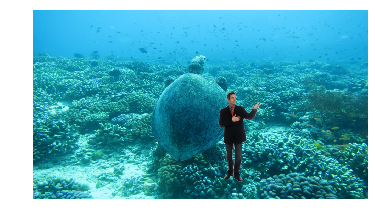

In [73]:
I = io.imread('/notebooks/maskrcnn-benchmark/datasets/coco/image2maskrcnn/dataset7/Image/%s'%(img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

10 [1] [2]


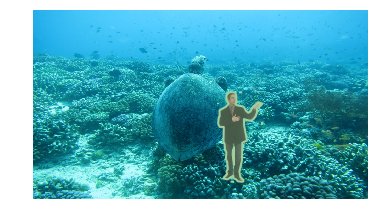

In [74]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
imglist = []
imglist.append(img['id'])
annIds = coco.getAnnIds(imgIds=imglist, catIds=catIds, iscrowd=0)
print(img['id'],catIds,annIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

1


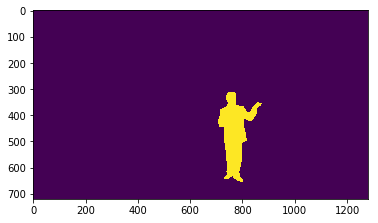

In [75]:
mask = coco.annToMask(anns[0])
print(len(anns))
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)

mask_img = Image.fromarray(mask)
mask_img.save('my_notcrowd.png')
mask_img.show()